In [21]:
import torch
from torch.nn import Linear, Sequential, ReLU
from torch.optim import Adam
from qlearner import QLearning
import gym
import matplotlib.pyplot as plt
import numpy as np

In [14]:
class TorchWrapper(gym.ObservationWrapper):
    def observation(self, obs):
        return torch.tensor(obs).float()

env = TorchWrapper(gym.make('CartPole-v1').env)
eval_env = TorchWrapper(gym.make('CartPole-v1'))

Q = Sequential(
    Linear(4, 8),
    ReLU(),
    Linear(8, 8),
    ReLU(),
    Linear(8, 2)
)

agt = QLearning(
    2,
    memory_len=5000,
    memory_shape=(4,),
    initial_eps=1.,
    decay_steps=5000,
    memory_dtype=torch.float
)
agt.Q = Q
agt.opt = Adam(agt.Q.parameters(), lr=0.001)

In [15]:
done = False
s = env.reset()
evals = []
for step in range(10000):
    a = agt.get_action(s)
    sp, r, done, _ = env.step(a)
    agt.handle_transition(s, a, r, sp, done)
    s = sp
    
    if done:
        s = env.reset()
        done = False
    if (step % 100) == 0:
        evals.append(agt.evaluate(eval_env, 5))
   

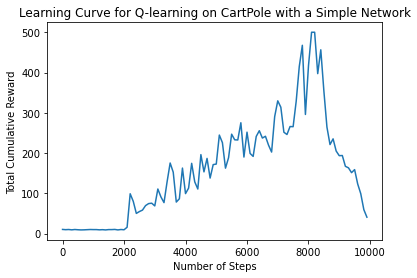

In [29]:
plt.plot(np.arange(100) * 100, evals)
plt.title('Learning Curve for Q-learning on CartPole with a Simple Network')
plt.ylabel('Total Cumulative Reward')
plt.xlabel('Number of Steps')

plt.show()

In [31]:
print(f'Number of parameters in the simple Q-network: {sum(p.numel() for p in agt.Q.parameters() if p.requires_grad)}')

Number of parameters in the simple Q-network: 130
